# Rental Bike Sharing Dataset

About Dataset:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

Attribute Information:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import joblib

In [2]:
df=pd.read_csv("hour.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.columns.tolist()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [5]:
# Dataset Shape
df.shape

(17379, 17)

In [6]:
df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [7]:
# Checking for null values
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [8]:
# Checking for Duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [10]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
# Summary Statistics
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
# Drop Irrelevant Columns
df.drop(columns=["instant", "dteday"], inplace=True)

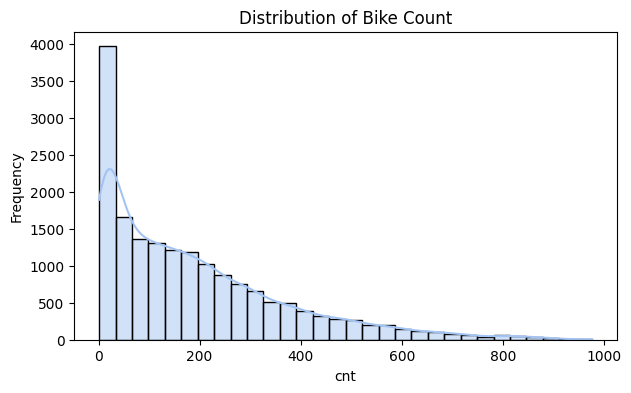

In [13]:
# Target Variable Analysis (cnt)
plt.figure(figsize=(7,4))
sns.histplot(df["cnt"], bins=30, kde=True, color="#a3c4f3")
plt.title("Distribution of Bike Count")
plt.xlabel("cnt")
plt.ylabel("Frequency")
plt.show()

INTERPRETATION:

- Rentals are right-skewed
- Most hours have moderate rentals
- Fewer extremely high demand spikes

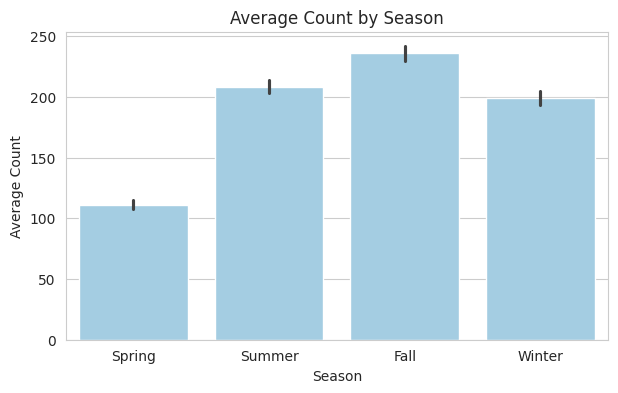

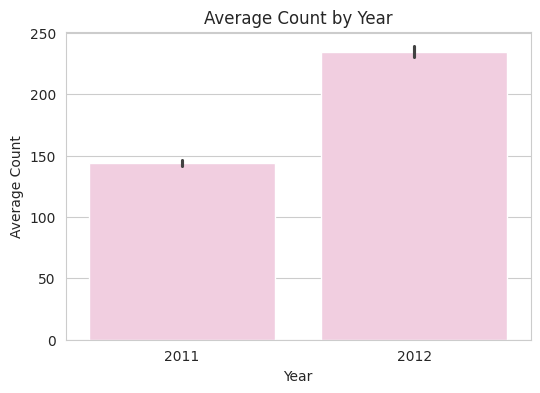

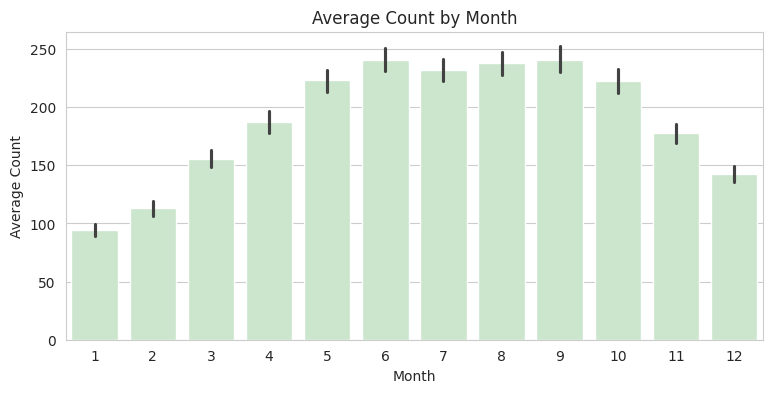

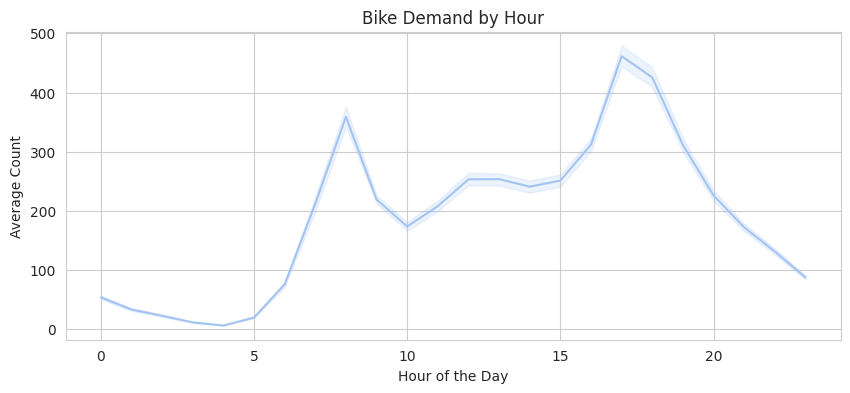

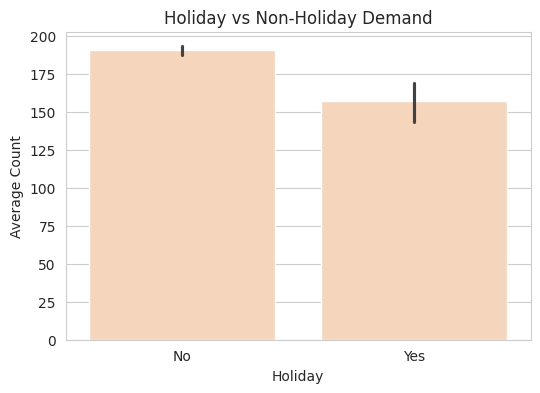

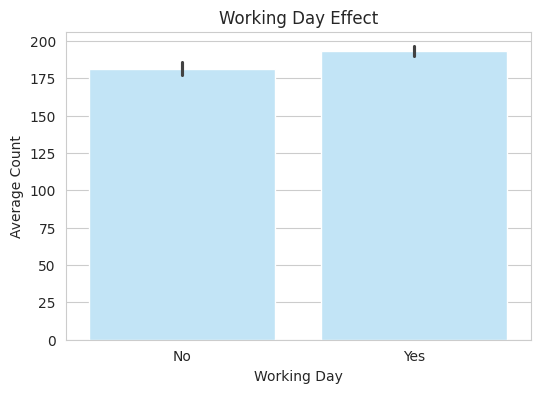

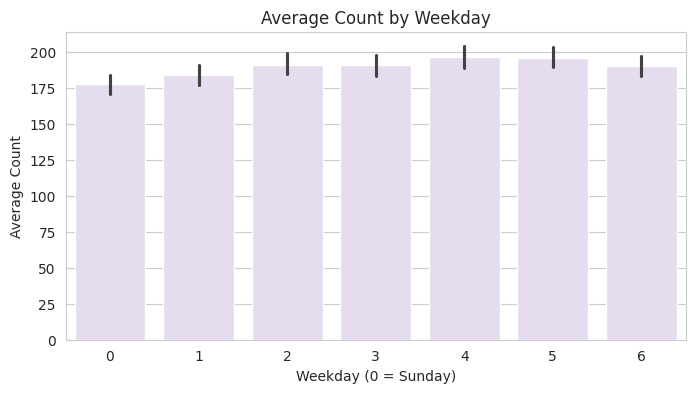

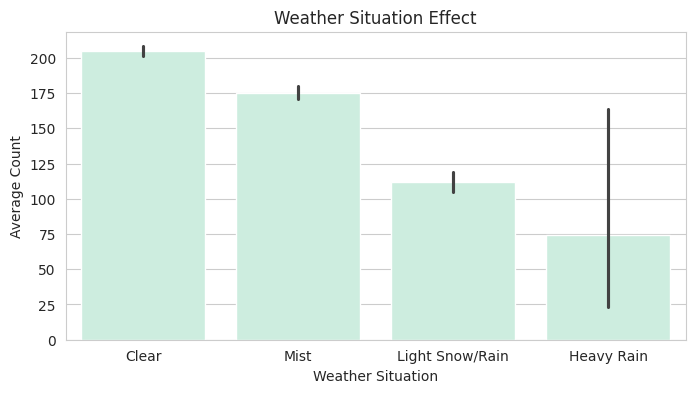

In [14]:
# Categorical features

sns.set_style("whitegrid")
sns.set_palette("pastel")

# Season
plt.figure(figsize=(7,4))
sns.barplot(x="season", y="cnt", data=df, estimator="mean", color="#9ad0ec")
plt.title("Average Count by Season")
plt.xlabel("Season")
plt.ylabel("Average Count")
plt.xticks(
    [0,1,2,3],
    ["Spring","Summer","Fall","Winter"]
)
plt.show()

# Year
plt.figure(figsize=(6,4))
sns.barplot(x="yr", y="cnt", data=df, estimator="mean", color="#f7c8e0")
plt.title("Average Count by Year")
plt.xlabel("Year")
plt.ylabel("Average Count")
plt.xticks([0,1],["2011","2012"])
plt.show()

# Month
plt.figure(figsize=(9,4))
sns.barplot(x="mnth", y="cnt", data=df, estimator="mean", color="#c6ebc9")
plt.title("Average Count by Month")
plt.xlabel("Month")
plt.ylabel("Average Count")
plt.show()

# Hour
plt.figure(figsize=(10,4))
sns.lineplot(x="hr", y="cnt", data=df, color="#a3c4f3")
plt.title("Bike Demand by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Count")
plt.show()

# Holiday
plt.figure(figsize=(6,4))
sns.barplot(x="holiday", y="cnt", data=df, estimator="mean", color="#ffd4b2")
plt.title("Holiday vs Non-Holiday Demand")
plt.xlabel("Holiday")
plt.ylabel("Average Count")
plt.xticks([0,1],["No","Yes"])
plt.show()

# Workingday
plt.figure(figsize=(6,4))
sns.barplot(x="workingday", y="cnt", data=df, estimator="mean", color="#b9e6ff")
plt.title("Working Day Effect")
plt.xlabel("Working Day")
plt.ylabel("Average Count")
plt.xticks([0,1],["No","Yes"])
plt.show()

# Weekday
plt.figure(figsize=(8,4))
sns.barplot(x="weekday", y="cnt", data=df, estimator="mean", color="#e5d9f2")
plt.title("Average Count by Weekday")
plt.xlabel("Weekday (0 = Sunday)")
plt.ylabel("Average Count")
plt.show()

# Weather Situation
plt.figure(figsize=(8,4))
sns.barplot(x="weathersit", y="cnt", data=df, estimator="mean", color="#c8f2e0")
plt.title("Weather Situation Effect")
plt.xlabel("Weather Situation")
plt.ylabel("Average Count")
plt.xticks(
    [0,1,2,3],
    ["Clear","Mist","Light Snow/Rain","Heavy Rain"]
)
plt.show()

INTERPRETATIONS:

1. Bike Count by Season: The bar chart shows how bike rentals vary across different seasons:

- Fall has the highest average bike usage, followed by Summer.
- Winter shows lower bike usage compared to Summer and Fall, likely due to colder temperatures and less favorable riding conditions.
- Spring has the lowest average bike count among all seasons.

2. Bike Usage Trend Across Years: The bar chart compares the average bike rental count between 2011 and 2012:

- 2012 shows a significantly higher average bike usage compared to 2011.
- The increase appears to be substantial, suggesting strong growth in bike demand over time.

3. Average Bike Count by Month: The plot shows how the average bike rental count varies month-by-month across the year.

- Rentals steadily increase from January (Month 1) through June (Month 6).
- Peak demand occurs around June–September (Months 6–9).
- After September, the rental count gradually decreases.
- November (11) and December (12) show significantly lower demand.
- January (1) and February (2) have the lowest rental counts, indicating minimal usage during cold winter months.

4. Demand Trend by Hour:

Very low demand at night (0:00–5:00)
- Demand steadily declines after midnight
- Reaches its lowest point around 4–5 AM

Sharp increase in the morning (6:00–9:00)
- Strong upward rise starting around 6 AM
- Peaks around 8–9 AM, people likely use bikes to go to work or school.

Midday moderate demand (10:00–15:00)
- Demand drops after morning peak
- Remains stable but moderate through late morning and early afternoon, Likely casual riders, errands, leisure trips.

Highest demand in evening (16:00–19:00)
- Another steep rise begins around 4 PM
- Highest peak around 5–6 PM, This shows evening commute time when people return home.

Decline at night (after 19:00)
- Demand steadily falls again after 7 PM

5. Holiday vs Non-Holiday Bike Demand: This chart compares the average bike rental count on holidays versus non-holidays.

- Non-holiday days show significantly higher average bike usage (around 190+ rentals).
- Holidays see a notable drop (around 155 rentals).
- The visible error bars suggest some variability, but the gap between holidays and non-holidays appears meaningful.

6. Working Day Effect on Bike Demand: This chart compares the average bike rental count on working days vs non-working days.

- Demand is Higher on Working Days, average ≈ 190+ rentals
- Non-Working Day (No) average ≈ 180+ rentals
- The error bars are small → demand is fairly consistent and predictable across working days.

7. Average Count by Weekday: This chart is interpreting how bike demand changes across days of the week.

- Demand is fairly consistent across the entire week, There is no dramatic drop or spike for any particular weekday.
- Peak usage late in the week (especially Friday), Friday shows the highest average demand.
- Saturday remains
- Sunday shows slightly lower demand compared to Saturday.
- However,the differences are small, and the error bars overlap, meaning the variation is not significant.

8. Weather Situation Effect: The chart is interpreting how different weather conditions affect the average count of bikes

Clear weather
- Highest average count (around 200+).
- Very small error bar → activity is consistently high when weather is clear.

Mist
- Slightly lower average count than clear weather.
- Still relatively stable with low variability.

Light Snow/Rain
- Noticeable drop in average count.
- Moderate variability, suggesting weather starts to significantly affect behavior.

Heavy Rain
- Lowest demand, Almost no high rental values.
- Very large error bar → activity is highly inconsistent (sometimes very low, sometimes much higher), likely depending on timing, severity, or other factors.

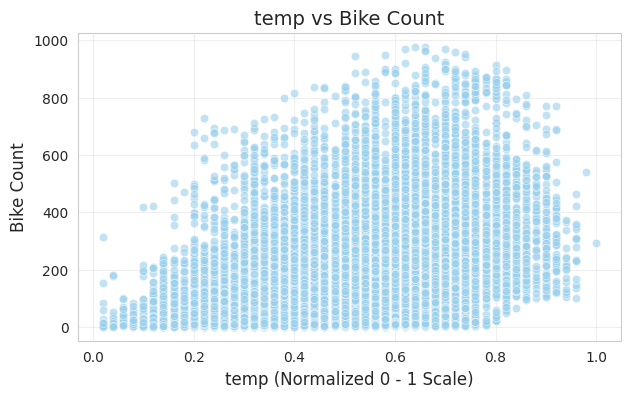

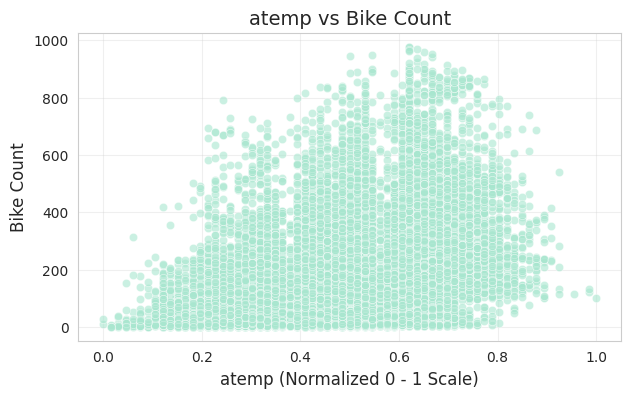

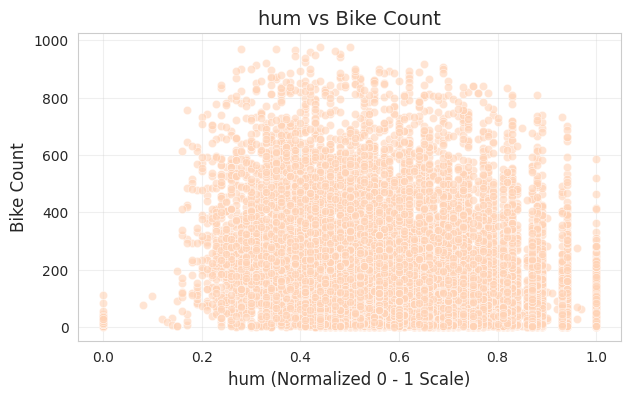

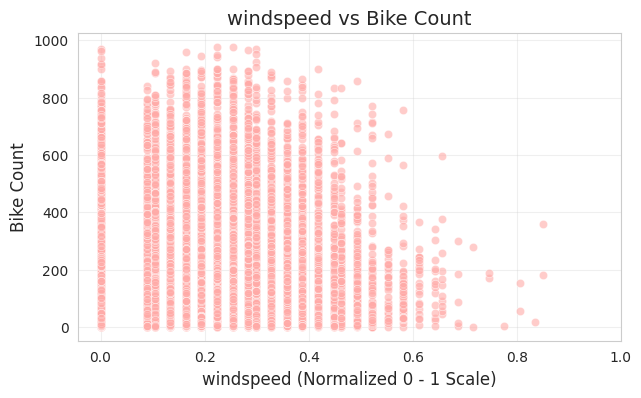

In [15]:
# Numerical Features

num_features = ["temp", "atemp", "hum", "windspeed"]

colors = {
    "temp": "#9AD0EC",
    "atemp": "#A8E6CF",
    "hum": "#FFD3B6",
    "windspeed": "#FFAAA7"
}

for feature in num_features:
    plt.figure(figsize=(7,4))

    sns.scatterplot(x=df[feature], y=df["cnt"], color=colors[feature], alpha=0.6)

    plt.title(f"{feature} vs Bike Count", fontsize=14)
    plt.xlabel(f"{feature} (Normalized 0 - 1 Scale)", fontsize=12)
    plt.ylabel("Bike Count", fontsize=12)

    # Good readable ticks for normalized data
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

    plt.grid(alpha=0.3)
    plt.show()


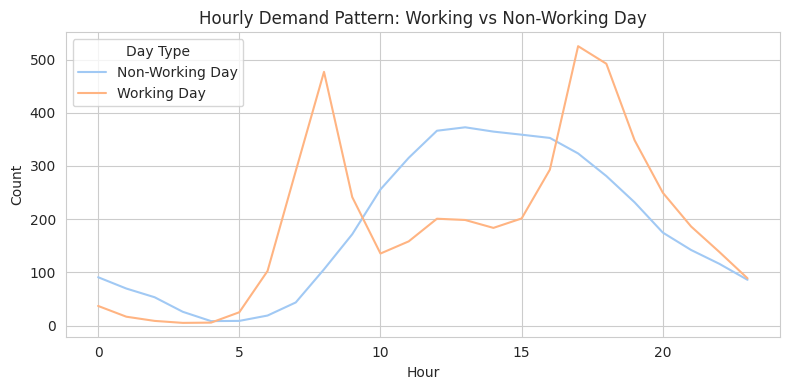

In [16]:
# Hourly Pattern Across Working & Non-Working Days
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x="hr", y="cnt", hue="workingday", errorbar=None)

plt.legend(labels=["Non-Working Day", "Working Day"], title="Day Type")
plt.title("Hourly Demand Pattern: Working vs Non-Working Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

INTERPRETATIONS:

- Early Morning (0–6 AM): Demand is low on both days
- Peak around 8–9 AM, Huge spike in rentals on working days,Minimal demand on non-working days at this time.
- Late Morning–Afternoon (10 AM – 3 PM): Demand stabilizes for both groups
- Evening Peak (5–7 PM): Big spike around 6 PM on working days
- Night (8 PM – 11 PM): Demand tapers off similarly for both, Slightly higher on non-working days later at night

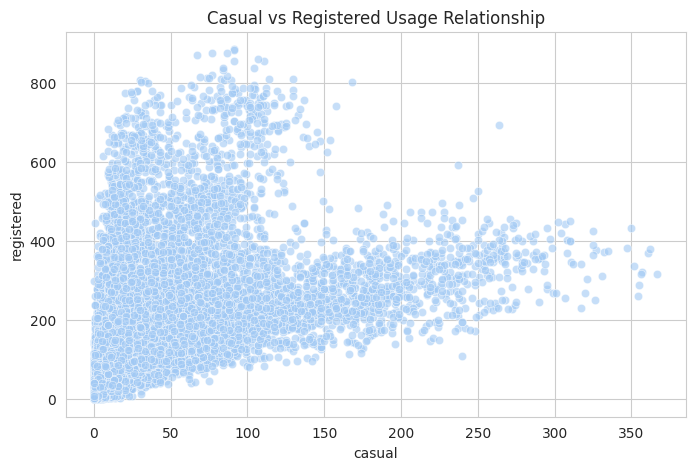

In [17]:
# Casual vs Registered Users
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="casual", y="registered", color=sns.color_palette("pastel")[0], alpha=0.6)
plt.title("Casual vs Registered Usage Relationship")
plt.show()

INTERPRETATIONS:

1. Registered users form the majority of rentals
- Many points are clustered toward higher registered counts.

2. Casual usage varies widely from very low to very high values.

- On normal days, casual usage is low to moderate
- On weekends or good-weather days, casual usage spikes

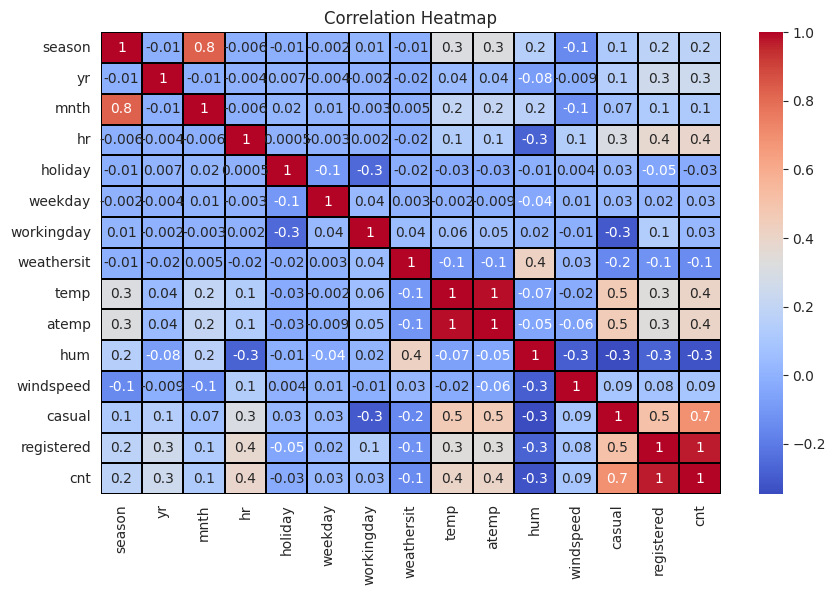

In [18]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot=True, cmap="coolwarm")
plt.yticks(rotation = 0)
plt.title("Correlation Heatmap")
plt.show()

INTERPRETATIONS:

- Registered and Casual users have the highest positive correlation with total rentals.(casual & registered ← leakage (cnt = casual + registered))
- Temperature (temp) and feels-like temperature (atemp) are also strongly correlated with rental counts. (atemp ← redundant with temp (0.99 corr))
- Humidity (hum) and Wind speed have negative correlations with bike rentals.
- Features such as holiday, weekday, workingday, and weather situation show little to no direct linear relationship with rental counts.

In [19]:
# Drop redundant columns
df = df.drop('atemp', axis=1)

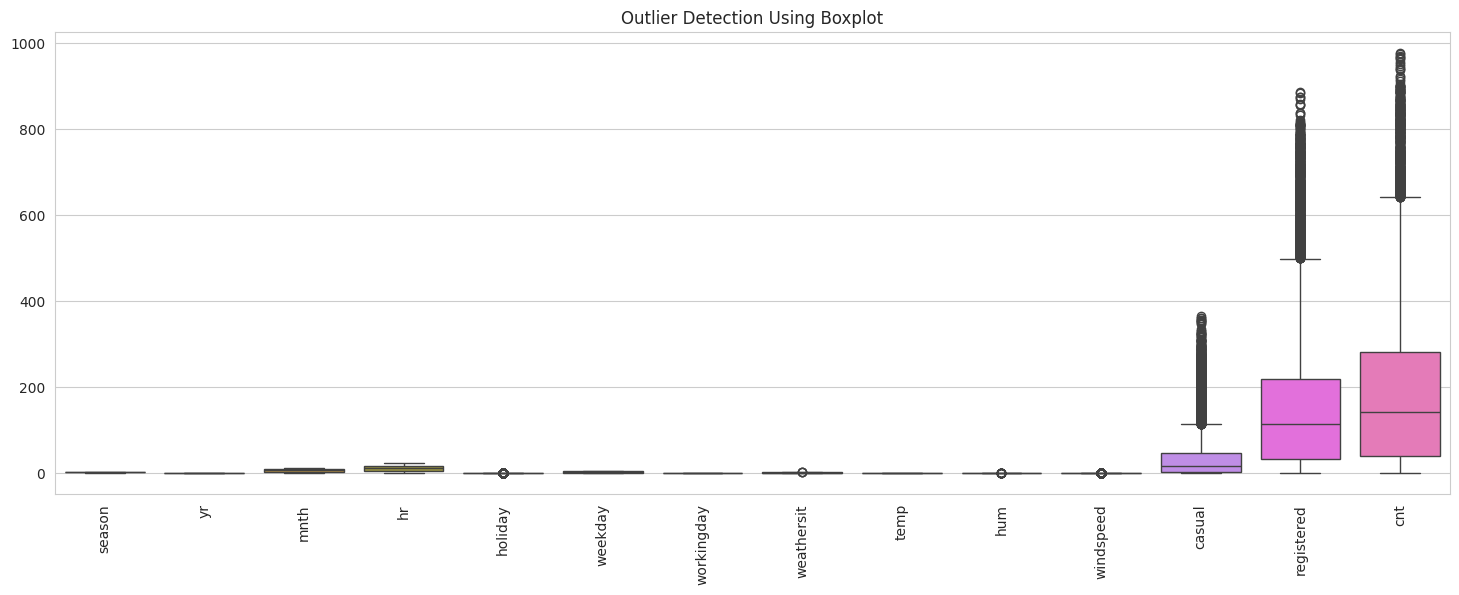

In [20]:
# Boxplot for Outlier Detection
plt.figure(figsize=(18,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Outlier Detection Using Boxplot")
plt.show()

In [21]:
# Apply IQR Capping
num_cols = df.select_dtypes(include=["number"]).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_cap, upper=upper_cap)

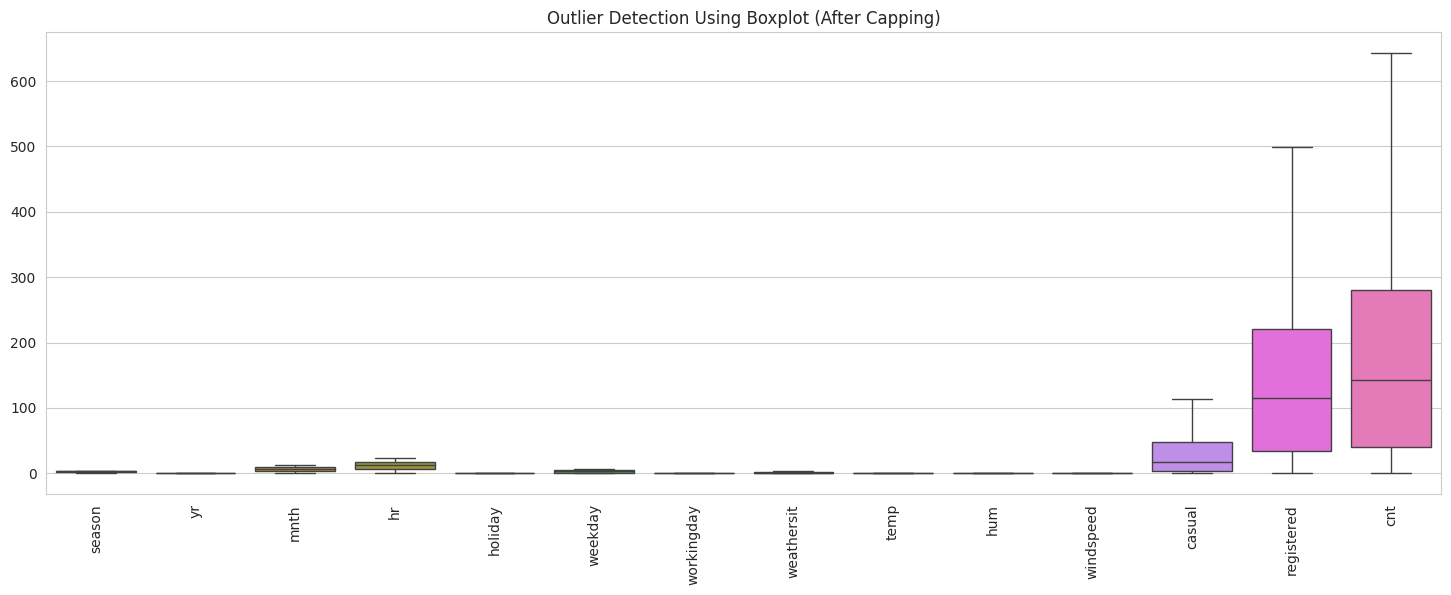

In [22]:
# Boxplot AFTER Capping
plt.figure(figsize=(18,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Outlier Detection Using Boxplot (After Capping)")
plt.show()

In [23]:
# Create a new column for log-transformed cnt
df['cnt_log'] = np.log1p(df['cnt'])

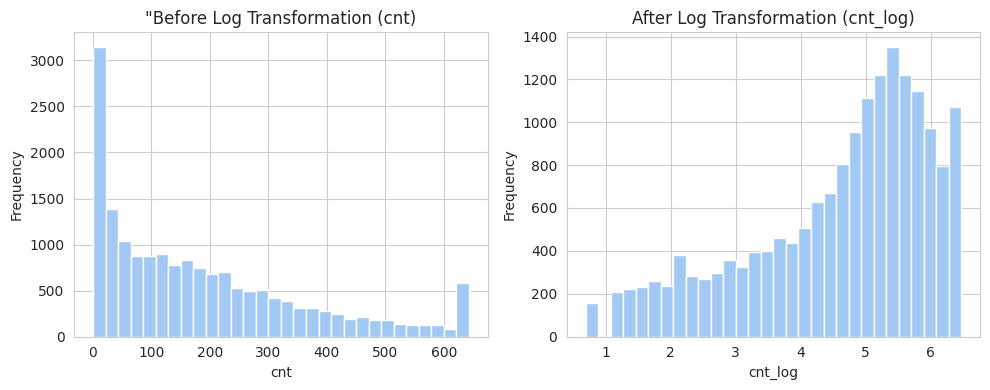

In [24]:
plt.figure(figsize=(10,4))

# Before log transformation
plt.subplot(1,2,1)
plt.hist(df['cnt'], bins=30)
plt.title('"Before Log Transformation (cnt)')
plt.xlabel('cnt')
plt.ylabel('Frequency')

# After log transformation
plt.subplot(1,2,2)
plt.hist(df['cnt_log'], bins=30)
plt.title('After Log Transformation (cnt_log)')
plt.xlabel('cnt_log')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
# Split Features & Target
X = df.drop(["cnt_log","cnt"], axis=1)
y = df["cnt_log"]

In [26]:
# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
# Define models and parameter grids

models = {
    "LinearRegression": (Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]), {}),

    "Ridge": (Pipeline([('scaler', StandardScaler()), ('model', Ridge())]),
              {'model__alpha':[0.1,1,10]}),

    "Lasso": (Pipeline([('scaler', StandardScaler()), ('model', Lasso(max_iter=5000))]),
              {'model__alpha':[0.001,0.01,0.1,1]}),

    "DecisionTree": (DecisionTreeRegressor(), {'max_depth':[5,10,20,None]}),

    "RandomForest": (RandomForestRegressor(),
                     {'n_estimators':[200,500],'max_depth':[None,20]}),

    "GradientBoosting": (GradientBoostingRegressor(),
                         {'n_estimators':[100,200],'learning_rate':[0.05,0.1]}),

    "AdaBoost": (AdaBoostRegressor(),
                 {'n_estimators':[50,100]}),

    "SVR": (Pipeline([('scaler', StandardScaler()), ('model', SVR())]),
           {'model__C':[1,10], 'model__gamma':['scale']}),

    "XGBoost": (XGBRegressor(objective='reg:squarederror'),
                {'n_estimators':[300,500],'learning_rate':[0.05,0.1]})
}

In [28]:
# Train and Evaluate Models

results = []
best_estimator = None
best_mae = np.inf   # because smaller MAE is better

for name, (model, param_grid) in models.items():
    pipe = Pipeline([('sc', StandardScaler()), ('model', model)])

    grid = {f"model__{k}": v for k, v in param_grid.items()}

    gs = GridSearchCV(pipe, grid, cv=3, n_jobs=-1)
    gs.fit(X_train, y_train)

    pred_train = gs.predict(X_train)
    pred_test  = gs.predict(X_test)

    train_r2 = r2_score(y_train, pred_train)
    test_r2  = r2_score(y_test, pred_test)
    mae = mean_absolute_error(y_test, pred_test)
    rmse = mean_squared_error(y_test, pred_test)

    results.append([name, train_r2, test_r2, mae, rmse])

    # Choose the best model by MAE
    if mae < best_mae:
        best_mae = mae
        best_estimator = gs.best_estimator_
        best_model_name = name

results_df = pd.DataFrame(results, columns=["Model","Train R2","Test R2","MAE","RMSE"])

print("\nTraining vs Testing Performance:\n")
print(results_df.sort_values(by="Test R2", ascending=False))

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training vs Testing Performance:

              Model  Train R2   Test R2       MAE      RMSE
8           XGBoost  0.999947  0.999814  0.009112  0.000364
4      RandomForest  0.999961  0.999757  0.007828  0.000475
5  GradientBoosting  0.999584  0.999539  0.019371  0.000901
3      DecisionTree  0.999662  0.999334  0.020129  0.001300
6          AdaBoost  0.981712  0.980889  0.162567  0.037308
7               SVR  0.980398  0.973995  0.130909  0.050767
0  LinearRegression  0.782986  0.773842  0.516310  0.441503
1             Ridge  0.782986  0.773835  0.516252  0.441517
2             Lasso  0.782981  0.773812  0.516163  0.441561


In [29]:
# Select the best model based on MAE

print("\nBest Model Based on MAE:")
print(best_model_name)

best_model_r2 = results_df.loc[results_df['Model'] == best_model_name, 'Test R2'].values[0]
print(f"Best Test R2: {best_model_r2:.4f}")


Best Model Based on MAE:
RandomForest
Best Test R2: 0.9998


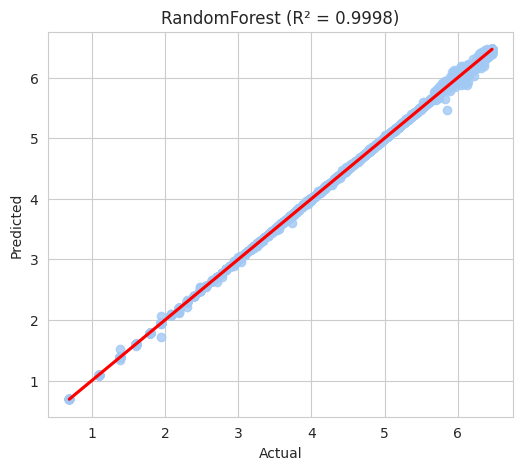

In [30]:
# Predict using the best model
pred = best_estimator.predict(X_test)

# Build comparison dataframe
df_compare = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': pred
})

plt.figure(figsize=(6,5))
sns.regplot(x='Actual', y='Predicted', data=df_compare, ci=None, line_kws={'color':'red'})
plt.title(f'{best_model_name} (R² = {best_model_r2:.4f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [31]:
# Compare actual vs predicted
print("\n Sample predictions:")
print(df_compare.head(10))


 Sample predictions:
     Actual  Predicted
0  6.054439   5.961145
1  4.488636   4.481816
2  1.609438   1.609438
3  6.267201   6.270571
4  2.639057   2.640724
5  3.496508   3.479125
6  6.466922   6.462899
7  3.295837   3.295809
8  1.098612   1.098612
9  3.091042   3.092376


In [32]:
# Saving Best Model

joblib.dump(best_estimator, "best_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [33]:
# Load the saved model
loaded_model = joblib.load("best_model.pkl")
print("Model loaded!")

Model loaded!


In [34]:
print(type(loaded_model))

<class 'sklearn.pipeline.Pipeline'>


In [35]:
# Prediction on Unseen/New Data
new_data = pd.DataFrame([{
    'season'     : 2,     # 1=spring,2=summer,3=fall,4=winter
    'yr'         : 1,     # 0=2011, 1=2012
    'mnth'       : 7,     # month number 1-12
    'hr'         : 15,    # hour of day 0-23
    'holiday'    : 0,     # 1=holiday, 0=non-holiday
    'weekday'    : 4,     # 0=Sunday ... 6=Saturday
    'workingday' : 1,     # 1=working day, 0=weekend/holiday
    'weathersit' : 1,     # 1=clear, 2=mist, 3=light snow/rain
    'temp'       : 0.55,  # normalized temperature (0-1)
    'hum'        : 0.48,  # normalized humidity (0-1)
    'windspeed'  : 0.12,  # normalized windspeed (0-1)
    'casual'     : 40,    # expected casual riders
    'registered' : 220    # expected registered riders
}])

In [36]:
prediction = best_estimator.predict(new_data)

print("Predicted bike rentals (cnt):", int(prediction[0]))

Predicted bike rentals (cnt): 5


In [37]:
new_data =pd.DataFrame([{
    'season'     : 1,     # 1=spring,2=summer,3=fall,4=winter
    'yr'         : 0,     # 0=2011, 1=2012
    'mnth'       : 6,     # month number 1-12
    'hr'         : 10,    # hour of day 0-23
    'holiday'    : 1,     # 1=holiday, 0=non-holiday
    'weekday'    : 2,     # 0=Sunday ... 6=Saturday
    'workingday' : 0,     # 1=working day, 0=weekend/holiday
    'weathersit' : 3,     # 1=clear, 2=mist, 3=light snow/rain
    'temp'       : 0.24,  # normalized temperature (0-1)
    'hum'        : 0.81,  # normalized humidity (0-1)
    'windspeed'  : 0.0,  # normalized windspeed (0-1)
    'casual'     : 5,    # expected casual riders
    'registered' : 16    # expected registered riders
}])

In [38]:
prediction = best_estimator.predict(new_data)

print("Predicted bike rentals (cnt):", int(prediction[0]))

Predicted bike rentals (cnt): 3


## Final Conclusion

The model predicts bike rentals using weather and time information. More bikes are rented during warm weather and busy hours, while fewer bikes are rented during cold or bad weather. Weather conditions strongly affect bike rental demand.